# Actividad 4 **K-Means**

### Librerías

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
sns.set(style="whitegrid")

### Cargamos los datos

In [2]:
df = pd.read_csv("Facebook_Marketplace_data.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,3525.500000,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,2035.304031,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,1763.250000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,3525.500000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,5287.750000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,7050.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

Descartamos las columnas Column1, Column2, Column3 y Column4, por lo que observamos en la actividad pasada (El hecho de que no fueran significativas).

Así como el identificador de la publicación (status_id), al ser de igual manera irrelevante para el análisis.

Las variables numéricas son seleccionadas.

In [5]:
df.drop(columns=["Column1", "Column2","Column3","Column4"],inplace=True) #inplace para que no cree una copia del mismo dataframe.

df_numeric = df.select_dtypes(include=["number"])
df_numeric.drop(columns=["status_id"],inplace=True)
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   num_reactions  7050 non-null   int64
 1   num_comments   7050 non-null   int64
 2   num_shares     7050 non-null   int64
 3   num_likes      7050 non-null   int64
 4   num_loves      7050 non-null   int64
 5   num_wows       7050 non-null   int64
 6   num_hahas      7050 non-null   int64
 7   num_sads       7050 non-null   int64
 8   num_angrys     7050 non-null   int64
dtypes: int64(9)
memory usage: 495.8 KB


In [6]:
df_numeric.columns

Index(['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

Ya seleccionadas las variables numéricas del dataset y se estandarizan con StandardScaler, que ajusta cada columna para que tenga media 0 y desviación estándar 1. De este modo, todas las variables quedan en la misma escala y ninguna domina el cálculo de distancias en K-means. El resultado (X_scaled) es un arreglo donde los valores indican cuántas desviaciones estándar se aleja cada dato de la media (positivos = por encima, negativos = por debajo).

In [7]:
features = df_numeric.columns

X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Se aplica el método del codo de sci-kit learn para comparar diferentes números de clusters y obtener el óptimo (Un "codo" donde la curva se suavice).

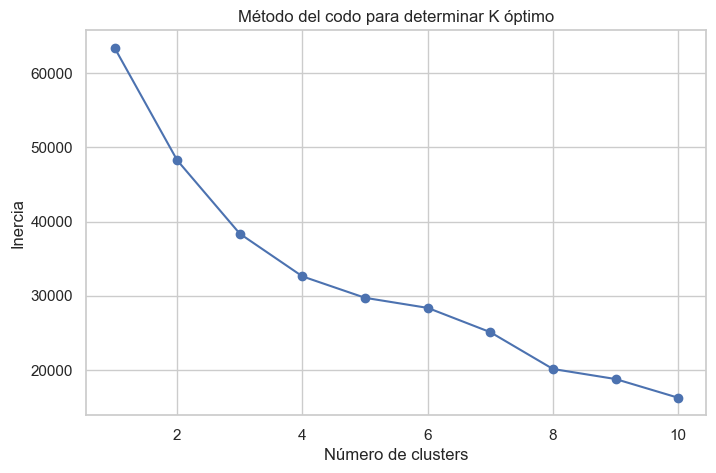

In [8]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar método del codo
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.title("Método del codo para determinar K óptimo")
plt.show()

Según el método del codo, se observa una caída muy pronunciada en la inercia entre k=1 y k=2, y todavía un descenso relevante en k=3,4. A partir de k=4 la curva se comienza a  suavizar. Por lo tanto, k=3 puede considerarse un óptimo básico (tres grandes grupos de publicaciones), mientras que k=4 ofrece una segmentación más detallada y también razonable.

Cabe mencionar que esto es una heurística dados los datos, es decir, cada dataset va a tener su k-óptimo de número de clusters.

In [9]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

### Centros

Obtenemos los centros de los clusters, en cada variable.

In [10]:
centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
print("Centros de los clusters:")
print(centers)

Centros de los clusters:
   num_reactions  num_comments  num_shares    num_likes   num_loves  \
0     111.127579     80.400349   17.811012   103.781339    6.355919   
1     579.518414   2861.226629  409.413598   450.339943  113.739377   
2    1830.249322     61.560976   11.558266  1824.479675    3.094851   
3    1618.000000   1626.846154  812.538462  1146.961538  322.692308   

     num_wows  num_hahas  num_sads  num_angrys  
0    0.534116   0.292447  0.120597    0.040781  
1    4.492918   6.977337  2.566572    1.390935  
2    2.439024   0.197832  0.032520    0.005420  
3  124.538462  20.423077  1.538462    1.846154  


### Visualizaciones

Creamos un gráfico comparando variables representativas.

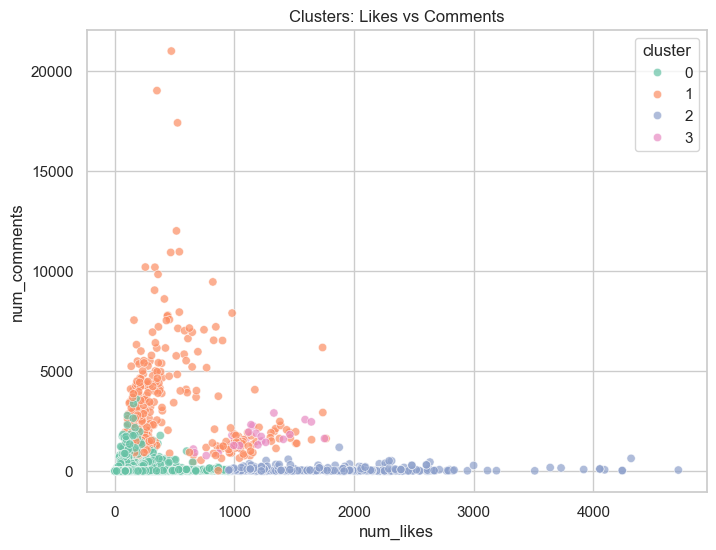

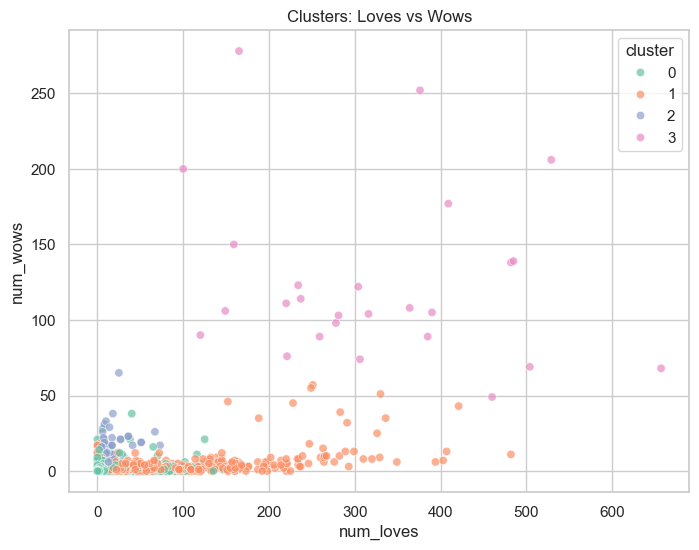

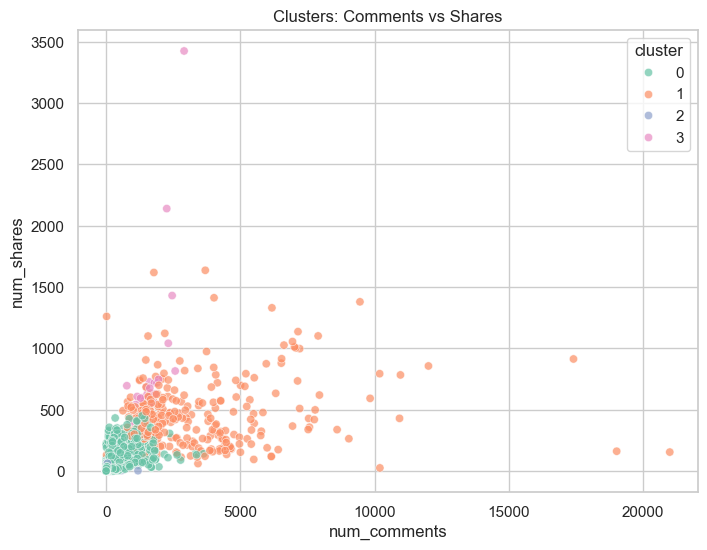

In [11]:
# Scatterplot 1: num_likes vs num_comments
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='num_likes',
    y='num_comments',
    hue='cluster',
    palette='Set2',
    data=df,
    alpha=0.7
)
plt.title("Clusters: Likes vs Comments")
plt.show()

# Scatterplot 2: num_loves vs num_wows
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='num_loves',
    y='num_wows',
    hue='cluster',
    palette='Set2',
    data=df,
    alpha=0.7
)
plt.title("Clusters: Loves vs Wows")
plt.show()

# Scatterplot 3: num_comments vs num_shares
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='num_comments',
    y='num_shares',
    hue='cluster',
    palette='Set2',
    data=df,
    alpha=0.7
)
plt.title("Clusters: Comments vs Shares")

plt.show()

Agrupamos por cluster, con las variables más significativas de cada uno. Basándonos en los centros de cada una.

In [12]:
reaction_cluster = df.groupby('cluster')['num_reactions'].value_counts().unstack(fill_value=0)
print(reaction_cluster)

comments_cluster = df.groupby('cluster')['num_comments'].value_counts().unstack(fill_value=0)
print(comments_cluster)

likes_cluster = df.groupby('cluster')['num_likes'].value_counts().unstack(fill_value=0)
print(likes_cluster)

wows_cluster = df.groupby('cluster')['num_wows'].value_counts().unstack(fill_value=0)
print(wows_cluster)

num_reactions  0     1     2     3     4     5     6     7     8     9     \
cluster                                                                     
0               121   131   124   116    78    94    67    76    85    82   
1                 0     0     0     0     0     0     0     0     0     0   
2                 0     0     0     0     0     0     0     0     0     0   
3                 0     0     0     0     0     0     0     0     0     0   

num_reactions  ...  3190  3510  3639  3730  3919  4094  4114  4315  4410  4710  
cluster        ...                                                              
0              ...     0     0     0     0     0     0     0     0     0     0  
1              ...     0     0     0     0     0     0     0     0     0     0  
2              ...     1     1     1     1     1     1     2     2     1     1  
3              ...     0     0     0     0     0     0     0     0     0     0  

[4 rows x 1067 columns]
num_comments  0      1    

## Interpretación de los resultados de K-means

### 1. ¿Qué significa cada cluster?

Cada cluster agrupa publicaciones con patrones similares de interacción (reacciones, comentarios, compartidos, etc.). Los centros de los clusters representan el comportamiento promedio de las publicaciones en ese grupo:

- Cluster 0 (bajo engagement general):  
Promedios muy bajos en todas las reacciones (casi sin hahas, wows, loves, etc.). Representa la mayoría de publicaciones que pasan desapercibidas.

- Cluster 1 (alto en comentarios y compartidos, pero con likes moderados):  
Tiene un promedio muy alto de comentarios (aprox. 2800) y compartidos (aprox. 400), además de bastantes likes y loves. Representa publicaciones que generan mucha conversación y viralidad más allá de los likes.

- Cluster 2 (likes muy altos, pero sin tantas reacciones emocionales):  
Alcanzan aprox. 1800 likes, pero con niveles bajos en loves, hahas y wows. Representa posts masivos en popularidad general (like fácil), pero sin engagement emocional fuerte.

- Cluster 3 (reacciones “emocionales” dominadas por wow y loves):  
Aunque tiene menos likes que el cluster 2, destaca por muchísimos wows (aprox. 125) y un nivel alto de loves (aprox. 320). Representa publicaciones que generan sorpresa, emoción o impacto más que solo likes.


### 2. ¿Por qué se eligió K=4?

El método del codo mostró que:

- De K=1 a K=3 la inercia cae de forma pronunciada.  
- A partir de K=4 la reducción se suaviza, indicando un buen equilibrio entre simplicidad y riqueza descriptiva.  

Con K=4 logramos segmentar los tipos principales de publicaciones: irrelevantes, virales por comentarios, virales por likes, y virales emocionales.


### 3. ¿Qué nos dicen los centros de los clusters?

- El Cluster 0 tiene valores cercanos a 0 en todas las métricas, lo que significa publicaciones sin impacto.  
- El Cluster 1 resalta por sus altísimos comentarios y compartidos, lo que puede significar debate o viralización.  
- El Cluster 2 resalta por likes masivos, lo que puede significar popularidad superficial.  
- El Cluster 3 resalta por wows y loves, lo que puede significar publicaciones con carga emocional.  

Esto confirma que cada cluster captura un patrón distinto de interacción.


### 4. ¿Cómo interpretar la visualización?

Para analizar los clusters identificados con K-means se generaron tres gráficos de dispersión con combinaciones de variables representativas. Cada uno resalta un tipo distinto de patrón:

1. Likes vs Comments  
- Se observa que el Cluster 2 agrupa publicaciones con muchísimos likes pero pocos comentarios, reflejando popularidad superficial.  
- El Cluster 1 concentra publicaciones con miles de comentarios y un número considerable de likes, lo que indica publicaciones polémicas o que generan debate.  
- Los clusters 0 y 3 se mantienen más cercanos al origen, con interacciones más bajas.  

2. Loves vs Wows  
- El Cluster 3 sobresale claramente en el eje de reacciones emocionales (wows y loves), mostrando publicaciones que generan sorpresa o impacto.  
- Los demás clusters presentan niveles muy bajos en estas métricas, lo que sugiere que este tipo de engagement es más exclusivo de ciertos posts.  

3. Comments vs Shares  
- El Cluster 1 vuelve a diferenciarse, concentrando publicaciones con altos comentarios y compartidos, lo que indica fuerte viralización.  
- Los clusters 0 y 2 se mantienen con valores bajos, representando publicaciones con poco alcance.  


### 5. ¿Qué factores predominan en cada cluster?

Factores que se pueden apreciar en cada cluster, son los siguientes:

- Cluster 0: Publicaciones olvidadas (irrelevantes).  
- Cluster 1: Publicaciones polémicas o noticiosas (muchos comentarios/shares).  
- Cluster 2: Publicaciones de alcance masivo (muchos likes, poco más).  
- Cluster 3: Publicaciones emocionales/impactantes (muchos loves y wows).  


### 6. ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?

Sí, son representativos en el sentido de que reflejan el promedio de cada grupo de publicaciones. Sin embargo, como la mayoría de publicaciones tienen interacciones muy bajas, los clusters pequeños pueden estar influenciados por outliers. Representan tendencias generales, pero no toda la diversidad de casos.  


### 7. ¿Cómo obtuviste el valor de k a usar?

El valor de k se obtuvo con el método del codo. La caída de inercia es fuerte hasta k=3 o k=4, y a partir de ahí la curva se suaviza. Se eligió k=4 porque distingue mejor las publicaciones emocionales de las que solo destacan por likes o comentarios.  


### 8. ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?

- Con un valor **más alto (k>4)** se podrían separar más subgrupos, pero algunos clusters quedarían con pocos datos y perderían representatividad.  
- Con un valor **más bajo (k=2 o k=3)** se tendrían clusters más generales, pero se mezclarían patrones distintos (ej. likes masivos y reacciones emocionales en el mismo grupo).  

En conclusión, k=4 da un buen balance entre detalle y simplicidad.  


### 9. ¿Qué distancia tienen los centros entre sí? ¿Hay alguno que esté muy cercano a otros?

Los centros presentan diferencias claras en variables principales:  
- Cluster 1 en comentarios/shares.  
- Cluster 2 en likes masivos.  
- Cluster 3 en loves y wows.  
- Cluster 0 en valores bajos en todo.  

En métricas de bajo impacto (ej. hahas, sads, angrys) algunos centros están cercanos, lo que refleja solapamiento. Pero en variables clave los centros se separan adecuadamente.  


### 10. ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?

Los outliers desplazarían los centros hacia valores extremos, haciendo que los promedios fueran menos representativos. K-means es muy sensible a outliers, por lo que conviene filtrarlos antes o usar algoritmos más robustos como K-medoids.  


### 11. ¿Qué puedes decir de los datos basándose en los centros?

- La mayoría de publicaciones generan bajo engagement (Cluster 0).  
- Algunas publicaciones se viralizan por conversación y difusión (Cluster 1).  
- Otras son populares por likes masivos pero con baja interacción emocional (Cluster 2).  
- Un grupo más pequeño genera impacto emocional con muchos loves y wows (Cluster 3).  

Esto refleja que en Facebook Marketplace existen diferentes formas de viralidad: superficial, por debate o emocional, además de la gran mayoría de publicaciones que pasan desapercibidas.

### 12. Reflexión final sobre K-means

- K-means permitió descubrir 4 arquetipos de publicaciones con base en la interacción.  
- La división depende de las métricas elegidas (reacciones, comentarios, shares).  
- Aunque los clusters no son “perfectos” visualmente (se solapan o no se aprecian realmente en las visualizaciones x,y), sí ofrecen insights accionables: diferenciar entre viralidad superficial (likes), viralidad de debate (comentarios), y viralidad emocional (wows/loves).  